# Freedom exploration

1. [Data exploration](#data_exploration)

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [2]:
filename='TABLE_III._Deaths_in_122_U.S._cities.csv'
df = pd.read_csv(filename)
df.head()

,Reporting Area,MMWR YEAR,MMWR WEEK,"All causes, by age (years), All Ages**","All causes, by age (years), All Ages**, flag","All causes, by age (years), >=65","All causes, by age (years), >=65, flag","All causes, by age (years), 45-64","All causes, by age (years), 45-64, flag","All causes, by age (years), 25-44","All causes, by age (years), 25-44, flag","All causes, by age (years), 1-24","All causes, by age (years), 1-24, flag","All causes, by age (years), LT 1","All causes, by age (years), LT 1, flag",P&I Total,"P&I Total, flag",Location 1,Location 2
0,New England,2016,1,600.0,NaN,426.0,NaN,125.0,NaN,28.0,NaN,12.0,NaN,9.0,NaN,47.0,NaN,NaN,NaN
1,Mid. Atlantic,2016,1,807.0,NaN,563.0,NaN,181.0,NaN,32.0,NaN,13.0,NaN,18.0,NaN,32.0,NaN,NaN,NaN
2,E.N. Central,2016,1,2468.0,NaN,1611.0,NaN,594.0,NaN,167.0,NaN,62.0,NaN,34.0,NaN,159.0,NaN,NaN,NaN
3,W.N. Central,2016,1,634.0,NaN,432.0,NaN,150.0,NaN,31.0,NaN,9.0,NaN,11.0,NaN,37.0,NaN,NaN,NaN
4,S. Atlantic,2016,1,1402.0,NaN,893.0,NaN,343.0,NaN,92.0,NaN,32.0,NaN,41.0,NaN,88.0,NaN,NaN,NaN


<a id='data_exploration'></a>
## Data exploration

In [3]:
df.describe()

,MMWR YEAR,MMWR WEEK,"All causes, by age (years), All Ages**","All causes, by age (years), >=65","All causes, by age (years), 45-64","All causes, by age (years), 25-44","All causes, by age (years), 1-24","All causes, by age (years), LT 1",P&I Total,Location 2
count,5148.0,5148.000000,4830.000000,4824.000000,4778.000000,4358.000000,3301.000000,3005.000000,4299.000000,0.0
mean,2016.0,20.000000,279.840373,187.677861,65.104018,19.521340,8.449258,7.186023,19.817865,NaN
std,0.0,11.255722,1080.741649,725.465670,249.953888,71.385536,26.659848,21.626929,73.040133,NaN
min,2016.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN
25%,2016.0,10.000000,39.000000,27.000000,8.000000,2.000000,1.000000,1.000000,3.000000,NaN
50%,2016.0,20.000000,77.000000,52.000000,18.000000,5.000000,3.000000,2.000000,6.000000,NaN
75%,2016.0,30.000000,154.000000,102.000000,37.000000,12.000000,5.000000,5.000000,12.000000,NaN
max,2016.0,39.000000,12883.000000,8816.000000,2963.000000,880.000000,276.000000,226.000000,936.000000,NaN


We are dealing with many NaN values, but its not clear how to treat them all. 
I will take the NaNs into account afterwards.

<a id='deaths_per_area'></a>
## Deaths per reporting area (all ages)


In [4]:
# Get a subsample of the dataset with deaths for all ages
# Do the report only for 2016 for simplicity
df_2016 = df[df['MMWR YEAR']==2016]
death_per_area = df_2016[['Reporting Area','All causes, by age (years), All Ages**']]
death_per_area.head()
death_per_area.columns=['Reporting Area','Deaths']

# 2. Drop NaNs:
print(len(death_per_area))
death_per_area = death_per_area.dropna()
print(len(death_per_area))

5148
4830


In [5]:
df.mean()

MMWR YEAR                                 2016.000000
MMWR WEEK                                   20.000000
All causes, by age (years), All Ages**     279.840373
All causes, by age (years), >=65           187.677861
All causes, by age (years), 45-64           65.104018
All causes, by age (years), 25-44           19.521340
All causes, by age (years), 1-24             8.449258
All causes, by age (years), LT 1             7.186023
P&I Total                                   19.817865
Location 2                                        NaN
dtype: float64

In [18]:
means=df.mean().values[3:8]
categories=['>=65','45-64','25-44','1-24','LT-1']
categories_ids=[1,2,3,4,5]
means


array([ 187.6778607 ,   65.10401842,   19.52134006,    8.4492578 ,
          7.18602329])

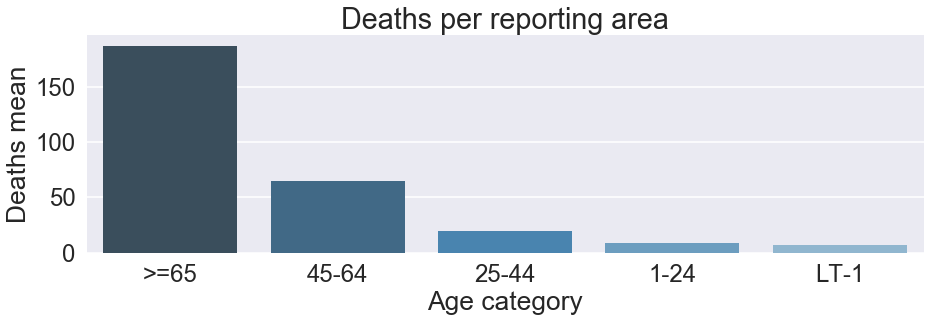

In [21]:
# Initialize the matplotlib figure
#f, ax = plt.pyplot.subplots(figsize=(15, 6))

#Set context, increase font size
sns.set_context("poster", font_scale=1.5)
#Create a figure
plt.pyplot.figure(figsize=(15, 4))
#Define the axis object
ax = sns.barplot(x=categories, y=means,  palette="Blues_d")
#set parameters
ax.set(xlabel='Age category', ylabel='Deaths mean', title= "Deaths per reporting area")
#show the plot
sns.plt.show()